# Facial Keypoint Detection Kaggle Competition

Kaggle competition to detect eyes, mouth and nose in grayscaled images.

In [39]:
%matplotlib inline
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
%aimport keypoints
%aimport plots
%aimport data
%aimport pipeline
%aimport submit
%aimport features

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

## Run pipeline

Set up the model, learn and predict.

In [42]:
X, Y, header = data.df_train()
Xpredict = data.df_predict()

In [43]:
p = pipeline.Pipeline(results_dir = 'results-notebook')

In [44]:
estimator = p.train(p.model(), X, Y)

In [45]:
Ypredict = p.predict(estimator, Xpredict)

## Images and keypoints from the training set

These are the given keypoints.

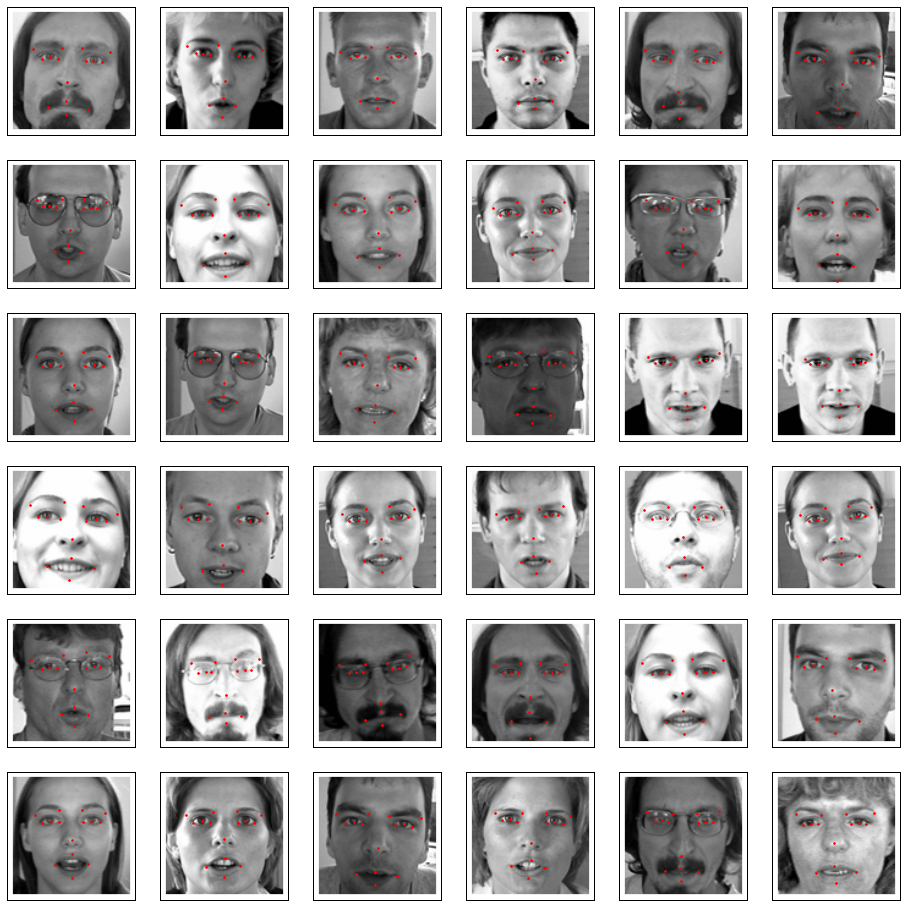

In [46]:
plots.show_imgs(X, Y, color = 'red')

Preprocessed images:

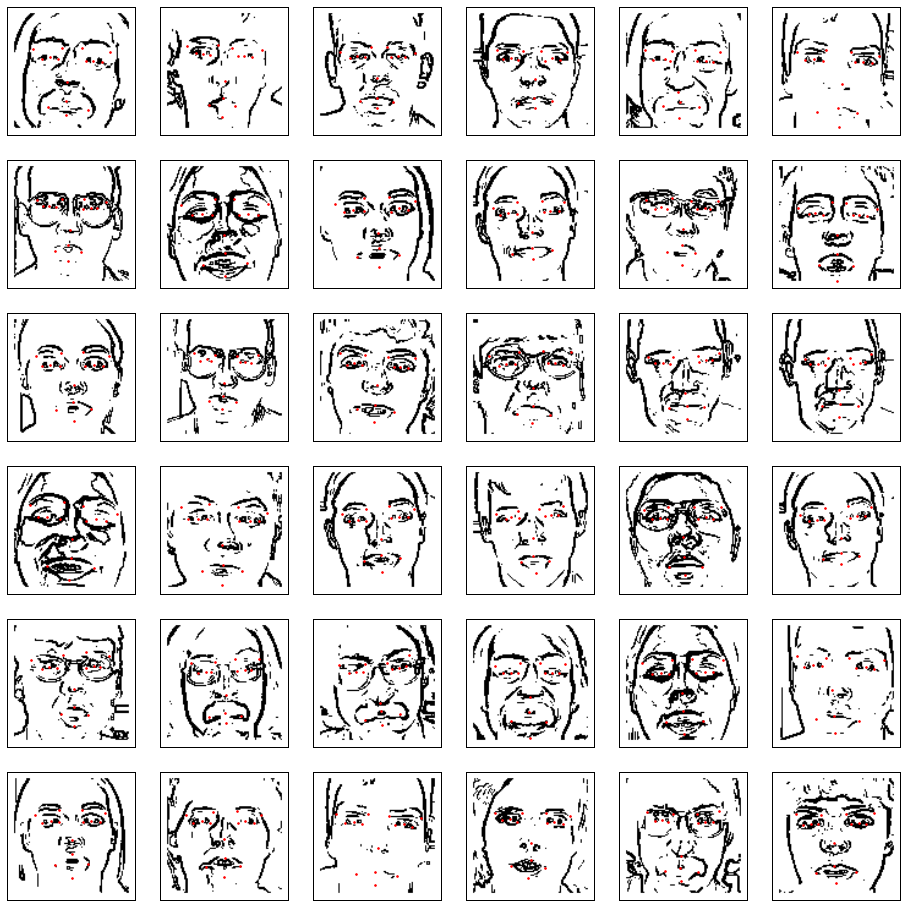

In [47]:
plots.show_preprocessed_imgs(p, X, Y, color = 'red')

## Predicted Keypoints

Using our model.

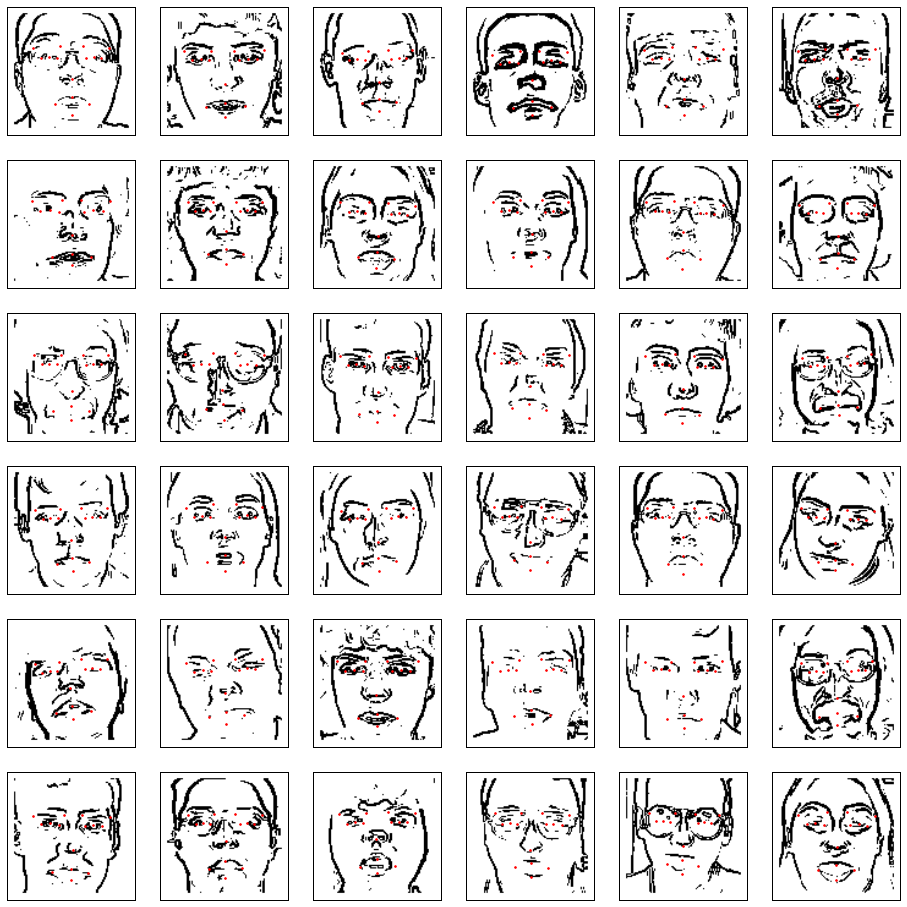

In [48]:
plots.show_preprocessed_imgs(p, Xpredict, Ypredict, color = 'red')

##### Cross Evaluation

Model evaluation with 10 folds.

In [49]:
p.evaluate(estimator, X, Y)

In [50]:
print p.pp_evaluation()

{
  "std": "0.655", 
  "upper_confidence_bound": "3.035", 
  "values": "1.889,1.887,1.941,1.871,1.801,2.038,2.339,3.070,3.576,3.380", 
  "lower_confidence_bound": "1.724", 
  "mean": "2.379"
}


# Validation Curve

Training and cross validation score as a function of the Ridge regularization parameter alpha.

In [72]:
param_range, train_scores, test_scores = p.validation_curve(sample = None)

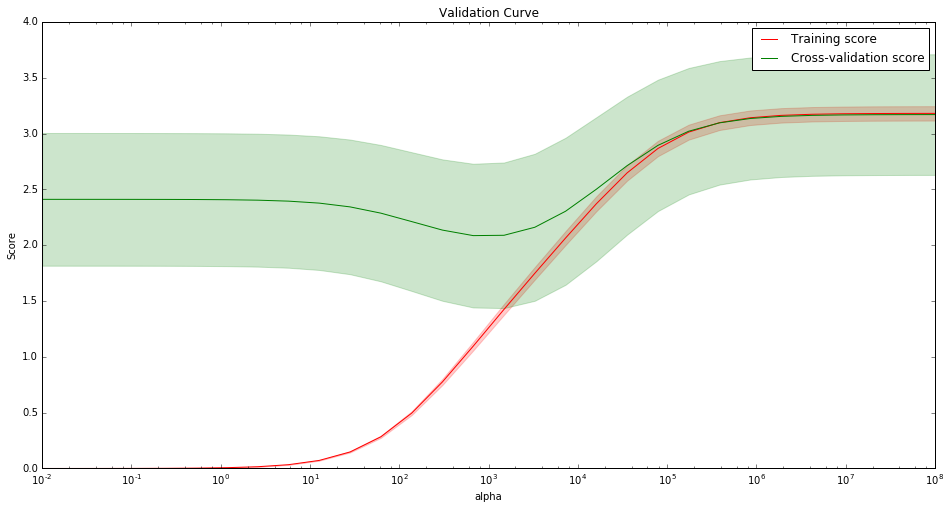

In [73]:
plots.plot_validation_curve(param_range, train_scores, test_scores)

# Learning Curves

Training and cross validation score as a function of the number of examples in the training set.

In [54]:
# sample to speed up computation. remove parameter for no sampling
train_sizes, train_scores, test_scores = p.learning_curves(sample = 100)

<module 'matplotlib.pyplot' from '/Users/purzelrakete/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

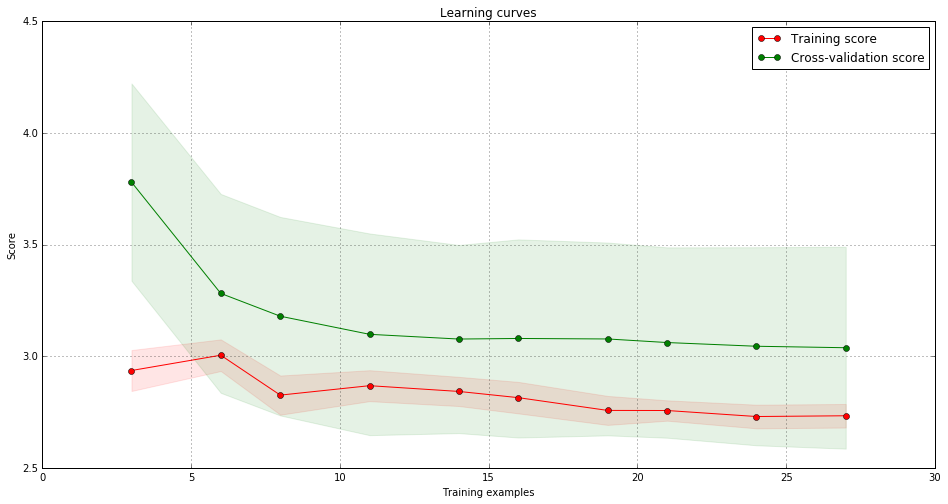

In [55]:
plots.plot_learning_curves(train_sizes, train_scores, test_scores)